# Outlier detection
This script was used to detect outliers in varve thickness in order to identify trubitidte deposits in lake records from Skilak, as described in Praet et al., 2022.

## Read the data file with core varve thickness

In [1]:
input_file = 'data/Skilak_outlierstudyloc1.csv'
data_set = read.csv(input_file)[,c(1,2)]

## Sort the varve thickness, remove missing values and print statistics

In [2]:
y = data_set$thickness
y = sort(y[!is.na(y)])
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0900  0.3810  0.5250  0.9499  0.7700 92.0920 

## Detect the varve thickness outliers
We use the outlier detection Method I as described in [M.P.J. van der Loo, Distribution based outlier detection for univariate data, Discussion paper 10003, Statistics Netherlands, The Hague (2010)](https://www.cbs.nl/-/media/imported/documents/2010/15/2010-03-x10-pub.pdf) and implemented in the [extremevalues](https://CRAN.R-project.org/package=extremevalues) R-package.

In [3]:
library(extremevalues)
L_0_75 = getOutliers(y, method = "I", rho = c(0.01,1), FLim=c(0,0.75), distribution= "lognormal")
L_0_75

Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“running command ''/usr/bin/otool' -L '/Users/tc/anaconda3/envs/praetetal2022/lib/R/library/tcltk/libs//tcltk.so'' had status 1”


0.9968124


## Create output

In [4]:
dir.create("output_methodI_0_75", showWarnings = FALSE)
output_file = strsplit(basename(input_file),".csv")[[1]]

### Write outlier list to file

In [5]:
df = do.call(rbind, lapply(L_0_75, data.frame, stringsAsFactors=FALSE))
write.csv(df, file.path("output_methodI_0_75",paste(output_file,"_statistics.csv",sep = "")),row.names = T)

### Generate QQ plot

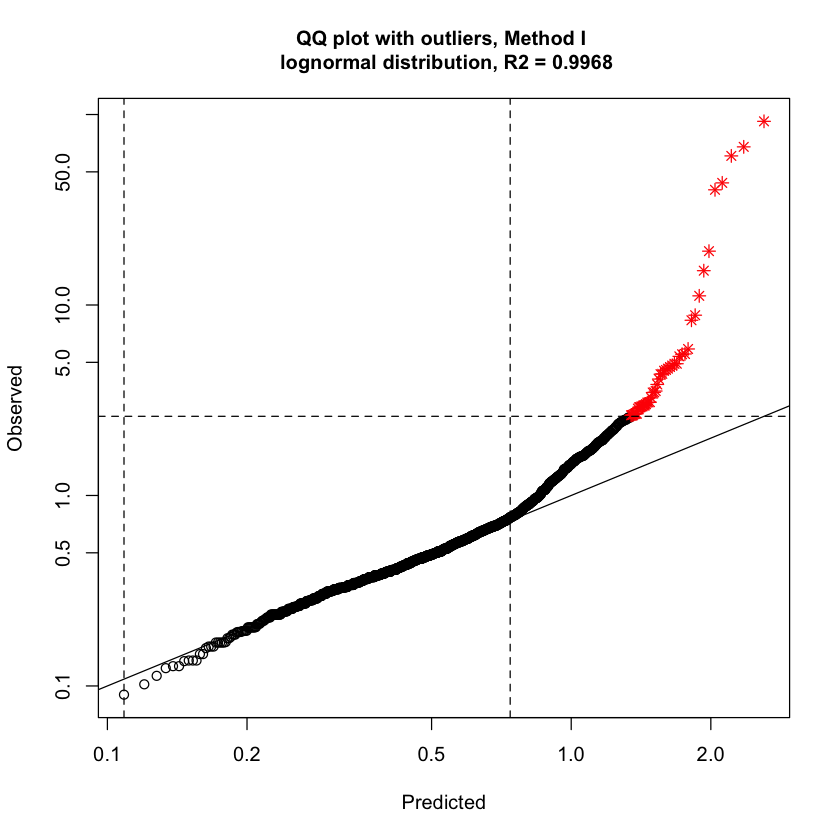

In [6]:
qqFitPlot(y, L_0_75)

In [7]:
pdf(file.path("output_methodI_0_75",paste(output_file,"_QQ.pdf",sep = "")))
qqFitPlot(y, L_0_75)
dev.off()

pdf 
  2

### Generate distribution histogram and model

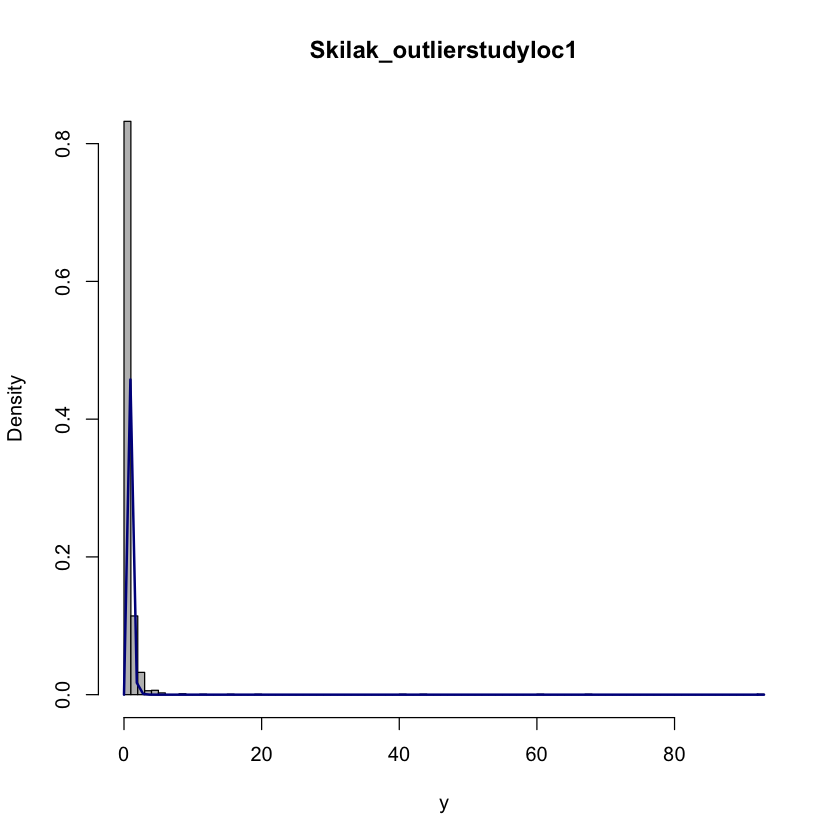

In [8]:
hist(y, probability = T, breaks = 100, col = "grey", main = output_file)
curve(dlnorm(x, meanlog = L_0_75$mu,  sdlog = L_0_75$sigma), col="darkblue", lwd=2, add = T)

In [9]:
pdf(file.path("output_methodI_0_75",paste(output_file,"_hist.pdf",sep = "")))
hist(y, probability = T, breaks = 100, col = "grey", main = output_file)
curve(dlnorm(x, meanlog = L_0_75$mu,  sdlog = L_0_75$sigma), col="darkblue", lwd=2, add = T)
dev.off()

pdf 
  2